## Interference with polarization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Utility Functions 

In [2]:
# Define Jones vectors for the two beams
def jones_vector(amp, type ,phase_x, phase_y):
    if type == 'horizontal': 
        return np.array([
            1,  # X-component
            0   # Y-component
        ])
    elif type == 'vertical': 
        return np.array([
            0,  # X-component
            1   # Y-component
        ])
    elif type == 'right':
        return np.array([
           1/np.sqrt(2) * 1,    # X-component
           1/np.sqrt(2) * -1j   # Y-component
        ])
    elif type == 'left':
        return np.array([
           1/np.sqrt(2) * 1,    # X-component
           1/np.sqrt(2) * 1j   # Y-component
        ])
    else:
        return np.array([
           amp * np.exp(1j * phase_x),  # X-component
           amp * np.exp(1j * phase_y)   # Y-component
        ])

# Wave generatot for plane and spherical waves
def wave_generator(type1, type2, lambda1, lambda2, z1, z2, X, Y, phi1, phi2):
    k1 = 2 * np.pi / lambda1  
    k2 = 2 * np.pi / lambda2  

    if type1 == 'plane':
        phase_E1 = (k1 * X)  - phi1   
    elif type1 == 'spherical':
        phase_E1 = k1 * np.sqrt(X**2 + Y**2 + z1**2)
    
    if type2 == 'plane':    
        phase_E2 = (k2 * X ) - phi2    
    elif type2 == 'spherical':
        phase_E2 = k2 * np.sqrt(X**2 + Y**2 + z2**2)

    return phase_E1, phase_E2


def Efield_generator(jvector1, jvector2, phase1, phase2, freq):
    Efield1 = np.array([
        jvector1[0] * np.exp(1j * phase1 ),  # X-component of beam 1
        jvector1[1] * np.exp(1j * phase1 )   # Y-component of beam 1
    ])

    Efield2 = np.array([
        jvector2[0] * np.exp(1j * phase2),  # X-component of beam 2
        jvector2[1] * np.exp(1j * phase2)   # Y-component of beam 2
    ])

    return Efield1, Efield2


### Parameters

In [ ]:
# Parameters for beam 1
amp1 = 1             
phase_x1 = np.pi/2     
phase_y1 = np.pi/2

# Parameters for beam 2
amp2 = 1            
phase_x2 = 0  
phase_y2 = 0

# Parameters for beams with different amplitudes
amp3 = 1/0.5
amp4 = 1

# Define spatial grid for interference pattern
x = np.linspace(-10, 10, 500)   # x-coordinates
y = np.linspace(-10, 10, 500)   # y-coordinates
X, Y = np.meshgrid(x, y)


# Define wave numbers for both beams
wavelength1 =  0.6  #  μm wavelength
wavelength2 = 0.75   # μm wavelength
z1 = 1     # distance from the source (for spherical wave interference pattern)
z2 = 1    # distance from the source (for spherical wave interference pattern)

print((amp3*amp4*2) / (amp4*amp4 + amp3*amp3))


0.8


### Initialization and matrix creation

In [50]:
# Create Jones vectors for both beams
E1 = jones_vector(
    amp1, '' ,phase_x1, phase_y1
)

E2 = jones_vector(
    amp2, '' ,phase_x2, phase_y2
)

phase_E1, phase_E2 = wave_generator(
    'plane', 'plane', wavelength1, wavelength2, z1, z2, X, Y, 0, 0
)

# Electric fields of the two beams at each (x, y) position
E_field_1, E_field_2 = Efield_generator(
    E1, E2, phase_E1, phase_E2, 0
)



In [51]:
# Resultant field: sum of both fields
E_total = E_field_1 + E_field_2

# Calculate intensity as the squared magnitude of the resultant field
intensity = np.abs(E_total[0])**2 + np.abs(E_total[1])**2

intensity_max = np.max(intensity)

### Comparison with different amplitude plane waves 

In [52]:
# Create Jones vectors for both beams
E3 = jones_vector(
    amp3, '' ,phase_x1, phase_y1
)

E4 = jones_vector(
    amp4, '' ,phase_x2, phase_y2
)

phase_E3, phase_E4 = wave_generator(
    'plane', 'plane', wavelength1, wavelength2, z1, z2, X, Y, 0, 0
)

# Electric fields of the two beams at each (x, y) position
E_field_3, E_field_4 = Efield_generator(
    E3, E4, phase_E3, phase_E4, 0
)

# Resultant field: sum of both fields
E_total_2 = E_field_3 + E_field_4

# Calculate intensity as the squared magnitude of the resultant field
intensity_2 = np.abs(E_total_2[0])**2 + np.abs(E_total_2[1])**2

intensity_2 = intensity_2 / intensity_max

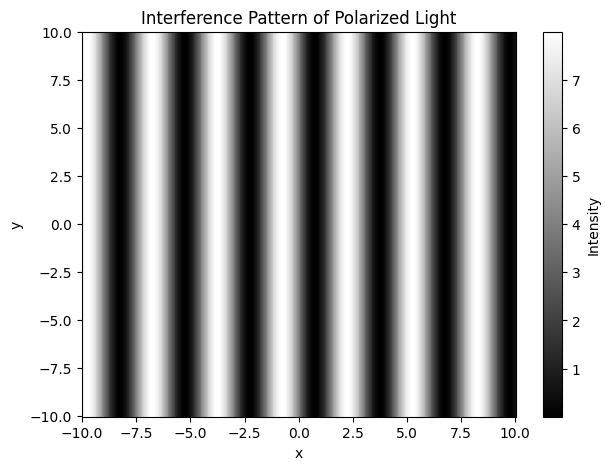

In [47]:
# Plot the resulting interference pattern
plt.figure(figsize=(7, 5))
plt.pcolormesh(X,Y,intensity, shading='auto',cmap='gray')
plt.colorbar(label='Intensity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interference Pattern of Polarized Light')
plt.show()

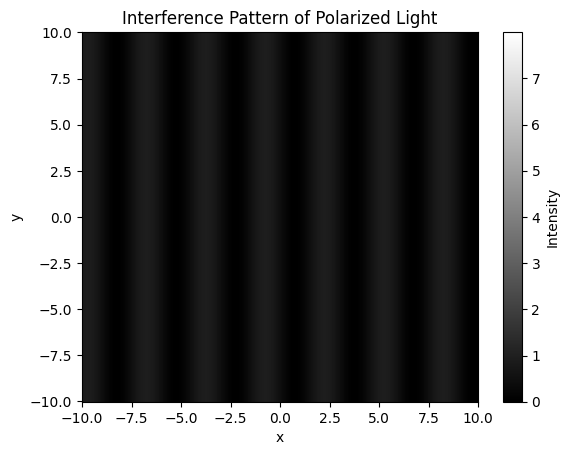

In [53]:
fig, ax = plt.subplots()

c = ax.pcolormesh(X, Y, intensity_2, vmin=0, vmax=intensity_max, shading='auto',cmap='gray')

# Add colorbar
fig.colorbar(c, ax=ax, label='Intensity')

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interference Pattern of Polarized Light')

plt.show()

### Polychromatic beams interference

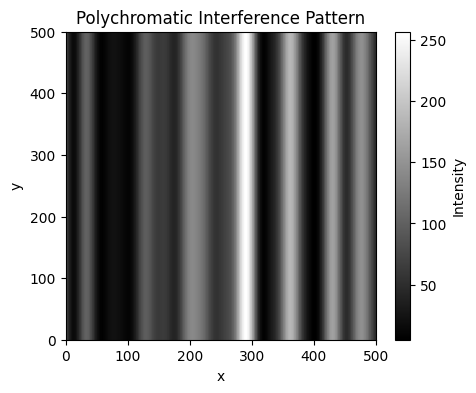

In [57]:
# Parameters
num_components_x = 100  # Number of frequency components 
num_components_y = 100  # Number of frequency components 
k_0 = 2 * np.pi / 0.5  # Central wave number, in 1/um

# Generate random distributed values
frequencies_x = np.random.uniform(0.4, 1.2, num_components_x) * k_0
amplitudes_x = np.random.uniform(0.1, 1, num_components_x)
phases_x = np.random.uniform(0, 2 * np.pi, num_components_x)

frequencies_y = np.random.uniform(0.4, 1.2, num_components_y) * k_0
amplitudes_y = np.random.uniform(0.1, 1, num_components_y)
phases_y = np.random.uniform(0, 2 * np.pi, num_components_y)

# Initialize electric fields for x and y polarizations
E_x_total = np.zeros_like(X, dtype=np.complex128)
E_y_total = np.zeros_like(X, dtype=np.complex128)

# Define spatial grid for interference pattern
x = np.linspace(-5, 5, 500)   # x-coordinates
y = np.linspace(-5, 5, 500)   # y-coordinates
X, Y = np.meshgrid(x, y)

# Sum over each frequency component
for q in range(num_components_x):
    E_x_total += amplitudes_x[q] * np.exp(1j * (frequencies_x[q] * X - phases_x[q]))

# Sum over each frequency component 
for r in range(num_components_y):
    E_y_total += amplitudes_y[r] * np.exp(1j * (frequencies_y[r] * X - phases_y[r]))

    # Calculate the intensity (magnitude squared of the resultant electric field)
intensity = np.abs(E_x_total)**2 + np.abs(E_y_total)**2

# Plot the resulting interference pattern
fig, ax = plt.subplots(figsize=(5, 4))
c = ax.pcolormesh( intensity, shading='auto', cmap='gray')
fig.colorbar(c, ax=ax, label='Intensity')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Polychromatic Interference Pattern')
plt.show()


### Pixel-wise polarization calculus

Functions are left here for better comprehension of the code.

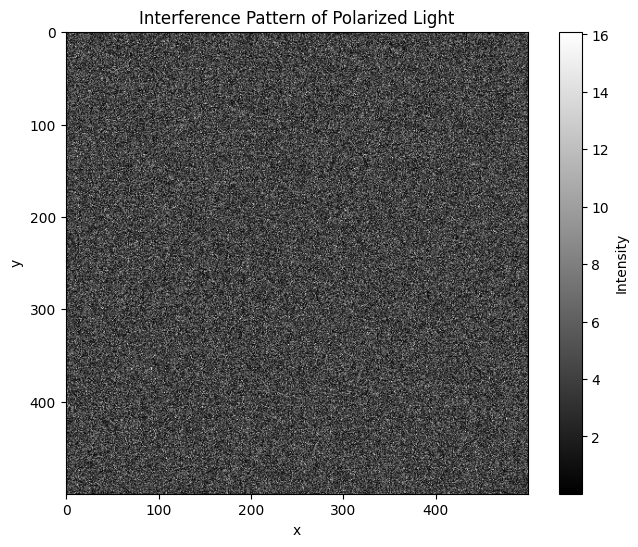

In [58]:
#Vector de Jones aleatorio para cada pixel
def jones_vector_random(amp_mean, phase_range):
    # Amplitud aleatoria en cada componente
    amp_x = amp_mean * (1 + np.random.rand() - 0.5) 
    amp_y = amp_mean * (1 + np.random.rand() - 0.5)

    # Fase aleatoria dentro del rango especificado
    phase_x = np.random.uniform(-phase_range, phase_range)
    phase_y = np.random.uniform(-phase_range, phase_range)

    return np.array([
        amp_x * np.exp(1j * phase_x),  # Componente X
        amp_y * np.exp(1j * phase_y)   # Componente Y
    ])

#Fases de onda plana para cada haz
def wave_phase_generator(lambda_, z, X, Y):
    k = 2 * np.pi / lambda_  
    return k * X

#Calculo de la fase para cada haz
phase_E1 = wave_phase_generator(wavelength1, z1, X, Y)
phase_E2 = wave_phase_generator(wavelength2, z2, X, Y)

intensity = np.zeros(X.shape)
polarization_angle = np.zeros(X.shape)

#Bucle para calcular polarización e interferencia en cada pixel
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        # Vector de Jones aleatorio en cada píxel
        E1_pixel = jones_vector_random(amp_mean=1, phase_range=np.pi)
        E2_pixel = jones_vector_random(amp_mean=1, phase_range=np.pi)

        # Campos eléctricos en cada píxel
        E_field_1_pixel = E1_pixel * np.exp(1j * phase_E1[i, j])
        E_field_2_pixel = E2_pixel * np.exp(1j * phase_E2[i, j])

        # Campo resultante y cálculo de intensidad
        E_total_pixel = E_field_1_pixel + E_field_2_pixel
        intensity[i, j] = np.abs(E_total_pixel[0])**2 + np.abs(E_total_pixel[1])**2

        # Cálculo del ángulo de polarización en cada píxel
        polarization_angle[i, j] = np.angle(E_total_pixel[0] + 1j * E_total_pixel[1])


plt.figure(figsize=(8, 6))
plt.imshow(intensity, cmap='gray')
plt.colorbar(label='Intensity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interference Pattern of Polarized Light')
plt.show()

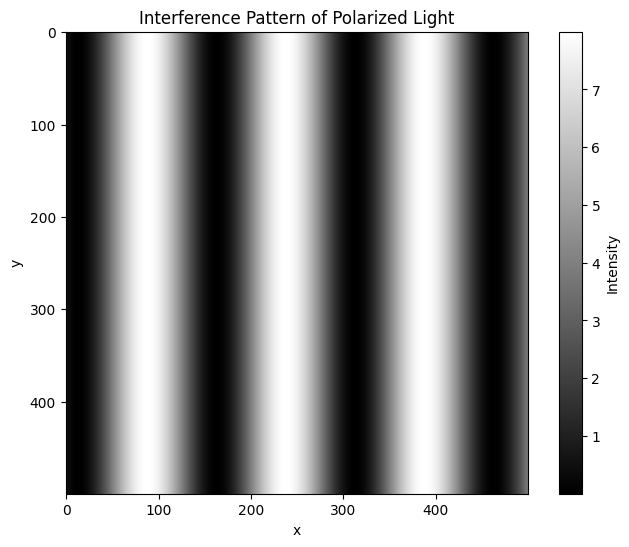

In [59]:
#Vector de Jones que depende de cada coordenada del pixel
def jones_vector_pixel(x, y, amp, phase_x, phase_y):
    return np.array([
        amp * np.exp(1j * (phase_x + x * 0.1)),  # Variación en componente X
        amp * np.exp(1j * (phase_y + y * 0.1))   # Variación en componente Y
    ])

#Fases de onda plana para cada haz
def wave_phase_generator(lambda_, z, X, Y):
    k = 2 * np.pi / lambda_  
    return k * X

#Calculo de la fase para cada haz
phase_E1 = wave_phase_generator(wavelength1, z1, X, Y)
phase_E2 = wave_phase_generator(wavelength2, z2, X, Y)

#Bucle para calcular polarización e interferencia en cada pixel
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        # Vector de Jones variable en cada píxel
        E1_pixel = jones_vector_pixel(X[i, j], Y[i, j], amp=1, phase_x=np.pi/6, phase_y=np.pi/6)
        E2_pixel = jones_vector_pixel(X[i, j], Y[i, j], amp=1, phase_x=0, phase_y=0)

        # Campos eléctricos en cada píxel
        E_field_1_pixel = E1_pixel * np.exp(1j * phase_E1[i, j])
        E_field_2_pixel = E2_pixel * np.exp(1j * phase_E2[i, j])

        # Campo resultante y cálculo de intensidad
        E_total_pixel = E_field_1_pixel + E_field_2_pixel
        intensity[i, j] = np.abs(E_total_pixel[0])**2 + np.abs(E_total_pixel[1])**2

        # Cálculo del ángulo de polarización en cada píxel
        polarization_angle[i, j] = np.angle(E_total_pixel[0] + 1j * E_total_pixel[1])

plt.figure(figsize=(8, 6))
plt.imshow(intensity, cmap='gray')
plt.colorbar(label='Intensity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interference Pattern of Polarized Light')
plt.show()

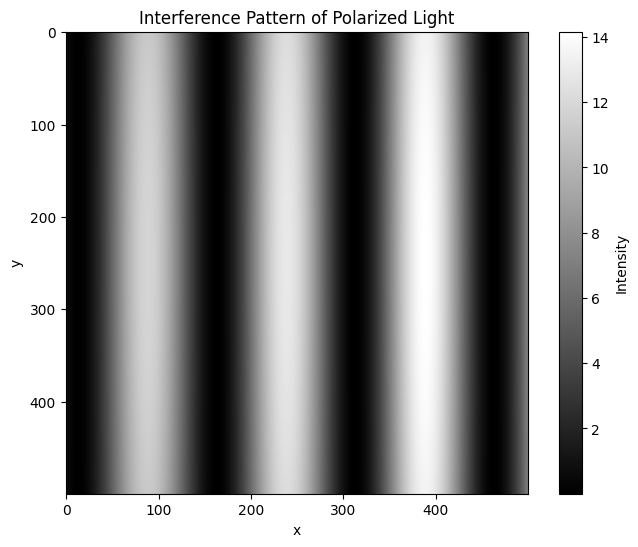

In [60]:
#Vector de Jones variando la amplitud y la fase para cada pixel
def jones_vector_advanced(x, y, amp, phase_x_base, phase_y_base):
    # Variación de la amplitud con una función senoidal
    amp_var_x = amp * (1 + 0.5 * np.sin(0.1 * x))
    amp_var_y = amp * (1 + 0.5 * np.cos(0.1 * y))

    # Variación en la fase usando funciones de ondas
    phase_x = phase_x_base + 0.5 * np.sin(0.1 * x) + 0.3 * np.cos(0.1 * y)
    phase_y = phase_y_base + 0.5 * np.cos(0.1 * x) + 0.3 * np.sin(0.1 * y)

    return np.array([
        amp_var_x * np.exp(1j * phase_x),  # Componente X
        amp_var_y * np.exp(1j * phase_y)   # Componente Y
    ])

#Fases de onda plana para cada haz
def wave_phase_generator(lambda_, z, X, Y):
    k = 2 * np.pi / lambda_  
    return k * X

#Calculo de la fase para cada haz
phase_E1 = wave_phase_generator(wavelength1, z1, X, Y)
phase_E2 = wave_phase_generator(wavelength2, z2, X, Y)

#Bucle para calcular polarización e interferencia en cada pixel
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        # Vector de Jones con variaciones adicionales en cada píxel
        E1_pixel = jones_vector_advanced(X[i, j], Y[i, j], amp=1, phase_x_base=np.pi/6, phase_y_base=np.pi/6)
        E2_pixel = jones_vector_advanced(X[i, j], Y[i, j], amp=1, phase_x_base=0, phase_y_base=0)

        # Campos eléctricos en cada píxel
        E_field_1_pixel = E1_pixel * np.exp(1j * phase_E1[i, j])
        E_field_2_pixel = E2_pixel * np.exp(1j * phase_E2[i, j])

        # Campo resultante y cálculo de intensidad
        E_total_pixel = E_field_1_pixel + E_field_2_pixel
        intensity[i, j] = np.abs(E_total_pixel[0])**2 + np.abs(E_total_pixel[1])**2

        # Cálculo del ángulo de polarización en cada píxel
        polarization_angle[i, j] = np.angle(E_total_pixel[0] + 1j * E_total_pixel[1])

plt.figure(figsize=(8, 6))
plt.imshow(intensity, cmap='gray')
plt.colorbar(label='Intensity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interference Pattern of Polarized Light')
plt.show()
